# 26 - Chi-Square Test

The **Chi-Square test** checks if two categorical variables are related.

**Key Idea:** When you have categories (like gender, age group, product choice), chi-square tells you if patterns between them are real or just random.

**Plain Explanation:** "Do boys and girls prefer different ice cream flavors? If the preferences differ a lot, the relationship is probably real."

**Story/Analogy:** Imagine a school cafeteria. You notice boys seem to choose pizza more often, while girls choose salad more often. Is this a real pattern, or just coincidence? Chi-square test answers this.

**When to Use:**
- Categorical data (groups, categories, yes/no)
- Testing if two variables are independent or related
- Need at least 5 observations per category
- Common in A/B testing, market research, demographics

## Simple Example: Ice Cream Preferences by Gender

You survey 200 kids at an ice cream shop about their favorite flavor.

🍦 Ice Cream Survey Results
       Chocolate  Vanilla
Boys          70       30
Girls         40       60

📊 Percentage Breakdown:
Boys: 70% chocolate, 30% vanilla
Girls: 40% chocolate, 60% vanilla


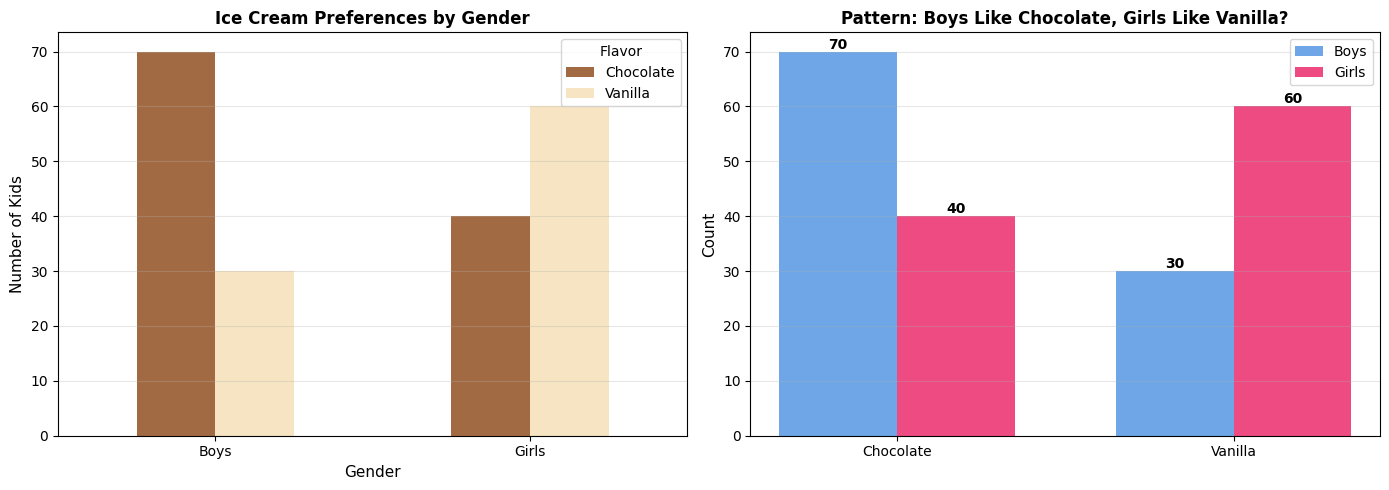


🤔 The Question: Is this pattern REAL or just RANDOM?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency

# Ice cream survey data
# Boys: 70 chocolate, 30 vanilla
# Girls: 40 chocolate, 60 vanilla
ice_cream_data = pd.DataFrame({
    'Chocolate': [70, 40],
    'Vanilla': [30, 60]
}, index=['Boys', 'Girls'])

print("🍦 Ice Cream Survey Results")
print("="*40)
print(ice_cream_data)
print()

# Calculate percentages for clarity
print("📊 Percentage Breakdown:")
for gender in ice_cream_data.index:
    total = ice_cream_data.loc[gender].sum()
    choc_pct = (ice_cream_data.loc[gender, 'Chocolate'] / total) * 100
    vanilla_pct = (ice_cream_data.loc[gender, 'Vanilla'] / total) * 100
    print(f"{gender}: {choc_pct:.0f}% chocolate, {vanilla_pct:.0f}% vanilla")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Stacked bar chart
ice_cream_data.plot(kind='bar', stacked=False, ax=ax1, color=['#8B4513', '#F5DEB3'], alpha=0.8)
ax1.set_title('Ice Cream Preferences by Gender', fontsize=12, fontweight='bold')
ax1.set_xlabel('Gender', fontsize=11)
ax1.set_ylabel('Number of Kids', fontsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.legend(title='Flavor')
ax1.grid(alpha=0.3, axis='y')

# Percentage breakdown
boys_pct = [70, 30]
girls_pct = [40, 60]
x = np.arange(2)
width = 0.35

bars1 = ax2.bar(x - width/2, boys_pct, width, label='Boys', color='#4A90E2', alpha=0.8)
bars2 = ax2.bar(x + width/2, girls_pct, width, label='Girls', color='#E91E63', alpha=0.8)

ax2.set_title('Pattern: Boys Like Chocolate, Girls Like Vanilla?', fontsize=12, fontweight='bold')
ax2.set_ylabel('Count', fontsize=11)
ax2.set_xticks(x)
ax2.set_xticklabels(['Chocolate', 'Vanilla'])
ax2.legend()
ax2.grid(alpha=0.3, axis='y')

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🤔 The Question: Is this pattern REAL or just RANDOM?")

## Running the Chi-Square Test

The test compares what we observed vs. what we'd expect if there was NO relationship.

🧮 Chi-Square Test Results
Chi-square statistic: 16.990
P-value: 0.000038
Degrees of freedom: 1

🎯 Expected Frequencies (if NO relationship):
       Chocolate  Vanilla
Boys        55.0     45.0
Girls       55.0     45.0



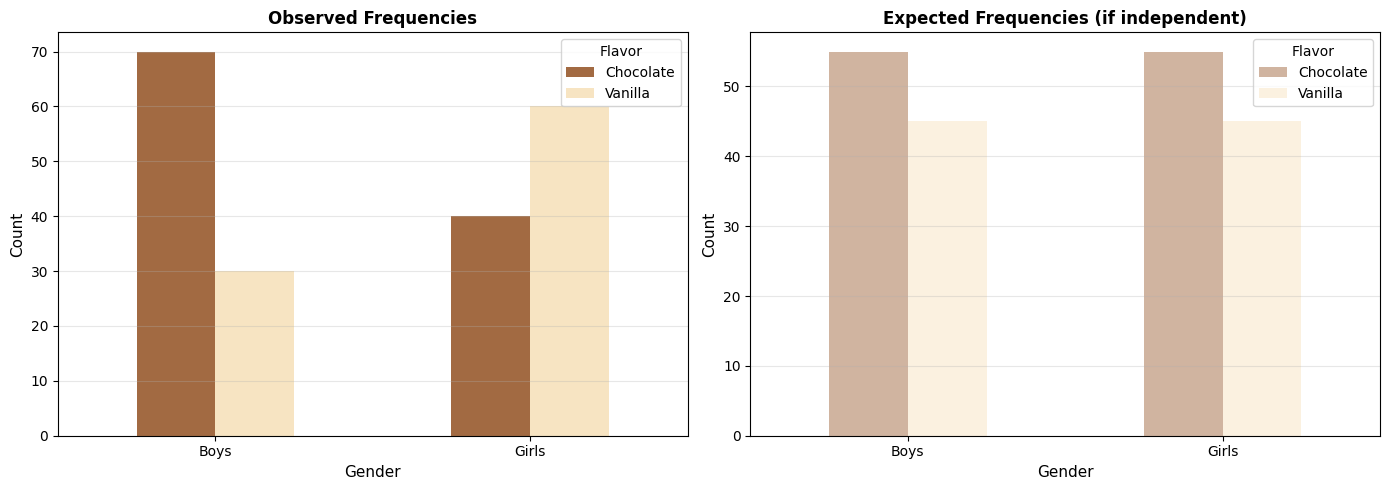


📊 Interpretation:
✅ SIGNIFICANT RELATIONSHIP FOUND! (p-value = 0.000038 < 0.05)
→ Gender and ice cream preference ARE related
→ Boys prefer chocolate more, girls prefer vanilla more
→ This pattern is very unlikely to be just random chance

💡 Key Insight:
   The chi-square value of 16.990 measures how different
   our observed data is from what we'd expect if there was no relationship.
   Larger chi-square = stronger relationship


In [2]:
# Run chi-square test
chi2_stat, p_value, dof, expected_freq = chi2_contingency(ice_cream_data)

print("🧮 Chi-Square Test Results")
print("="*40)
print(f"Chi-square statistic: {chi2_stat:.3f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")
print()

# Show expected frequencies (if NO relationship)
expected_df = pd.DataFrame(expected_freq, 
                          columns=['Chocolate', 'Vanilla'],
                          index=['Boys', 'Girls'])
print("🎯 Expected Frequencies (if NO relationship):")
print(expected_df.round(1))
print()

# Compare observed vs expected
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Observed
ice_cream_data.plot(kind='bar', ax=ax1, color=['#8B4513', '#F5DEB3'], alpha=0.8)
ax1.set_title('Observed Frequencies', fontsize=12, fontweight='bold')
ax1.set_xlabel('Gender', fontsize=11)
ax1.set_ylabel('Count', fontsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.legend(title='Flavor')
ax1.grid(alpha=0.3, axis='y')

# Expected
expected_df.plot(kind='bar', ax=ax2, color=['#8B4513', '#F5DEB3'], alpha=0.4)
ax2.set_title('Expected Frequencies (if independent)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Gender', fontsize=11)
ax2.set_ylabel('Count', fontsize=11)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.legend(title='Flavor')
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Interpret results
print("\n📊 Interpretation:")
alpha = 0.05
if p_value < alpha:
    print(f"✅ SIGNIFICANT RELATIONSHIP FOUND! (p-value = {p_value:.6f} < 0.05)")
    print("→ Gender and ice cream preference ARE related")
    print("→ Boys prefer chocolate more, girls prefer vanilla more")
    print("→ This pattern is very unlikely to be just random chance")
else:
    print(f"❌ NO SIGNIFICANT RELATIONSHIP (p-value = {p_value:.6f} >= 0.05)")
    print("→ Gender and ice cream preference are NOT significantly related")
    print("→ The differences could easily be due to random chance")

print("\n💡 Key Insight:")
print(f"   The chi-square value of {chi2_stat:.3f} measures how different")
print("   our observed data is from what we'd expect if there was no relationship.")
print("   Larger chi-square = stronger relationship")

## Real-World Example: Product Preferences by Age Group

A retailer wants to know if different age groups prefer different product types. This helps with targeted marketing.

🛍️ Product Preference Survey Results
       Electronics  Clothing  Home Goods
18-30           80        50          20
31-50           60        60          40
51+             30        50          70

📊 Percentage Breakdown by Age Group:

18-30 years:
  Electronics: 80 customers (53.3%)
  Clothing: 50 customers (33.3%)
  Home Goods: 20 customers (13.3%)

31-50 years:
  Electronics: 60 customers (37.5%)
  Clothing: 60 customers (37.5%)
  Home Goods: 40 customers (25.0%)

51+ years:
  Electronics: 30 customers (20.0%)
  Clothing: 50 customers (33.3%)
  Home Goods: 70 customers (46.7%)


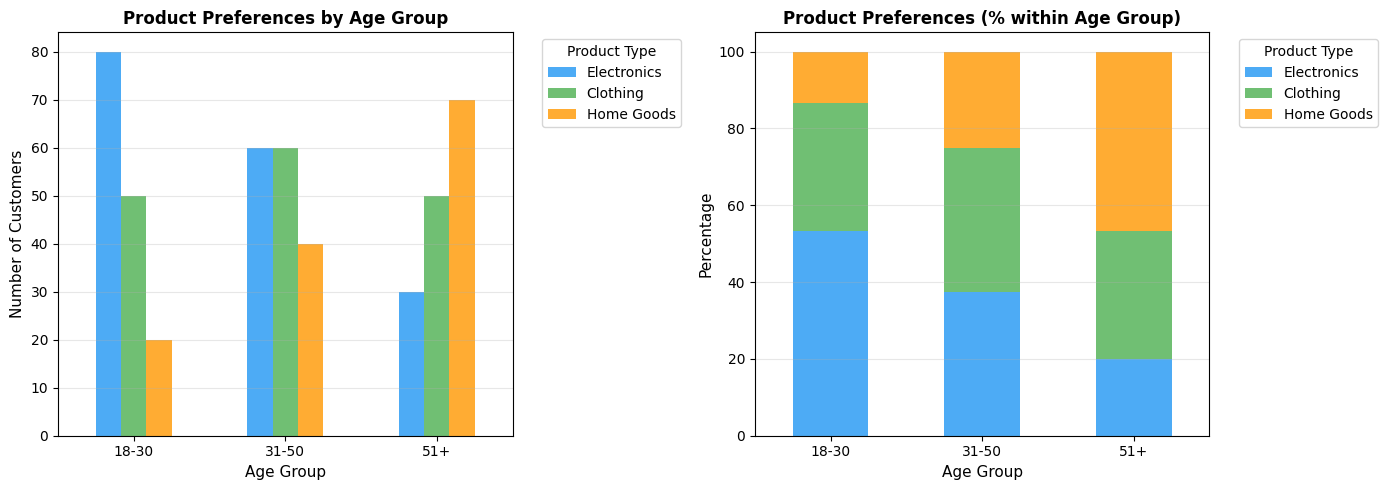


👀 Pattern Observations:
   • Young (18-30): Electronics dominate (53%)
   • Middle (31-50): More balanced preferences
   • Older (51+): Home Goods dominate (47%)


In [3]:
# Product preference survey: 500 customers across 3 age groups
# Age groups: 18-30, 31-50, 51+
# Products: Electronics, Clothing, Home Goods

product_data = pd.DataFrame({
    'Electronics': [80, 60, 30],
    'Clothing': [50, 60, 50],
    'Home Goods': [20, 40, 70]
}, index=['18-30', '31-50', '51+'])

print("🛍️ Product Preference Survey Results")
print("="*50)
print(product_data)
print()

# Calculate percentages
print("📊 Percentage Breakdown by Age Group:")
for age in product_data.index:
    total = product_data.loc[age].sum()
    print(f"\n{age} years:")
    for product in product_data.columns:
        count = product_data.loc[age, product]
        pct = (count / total) * 100
        print(f"  {product}: {count} customers ({pct:.1f}%)")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Grouped bar chart
product_data.plot(kind='bar', ax=ax1, color=['#2196F3', '#4CAF50', '#FF9800'], alpha=0.8)
ax1.set_title('Product Preferences by Age Group', fontsize=12, fontweight='bold')
ax1.set_xlabel('Age Group', fontsize=11)
ax1.set_ylabel('Number of Customers', fontsize=11)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.legend(title='Product Type', bbox_to_anchor=(1.05, 1))
ax1.grid(alpha=0.3, axis='y')

# Stacked percentage chart
product_pct = product_data.div(product_data.sum(axis=1), axis=0) * 100
product_pct.plot(kind='bar', stacked=True, ax=ax2, color=['#2196F3', '#4CAF50', '#FF9800'], alpha=0.8)
ax2.set_title('Product Preferences (% within Age Group)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Age Group', fontsize=11)
ax2.set_ylabel('Percentage', fontsize=11)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.legend(title='Product Type', bbox_to_anchor=(1.05, 1))
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n👀 Pattern Observations:")
print("   • Young (18-30): Electronics dominate (53%)")
print("   • Middle (31-50): More balanced preferences")
print("   • Older (51+): Home Goods dominate (47%)")

## Testing the Product-Age Relationship

Now let's test if these differences are statistically significant.

🧮 Chi-Square Test for Product Preferences
Chi-square statistic: 53.500
P-value: 0.00000000
Degrees of freedom: 4

🎯 Expected Frequencies (if age and preference were independent):
       Electronics  Clothing  Home Goods
18-30         55.4      52.2        42.4
31-50         59.1      55.7        45.2
51+           55.4      52.2        42.4

📊 Difference (Observed - Expected):
       Electronics  Clothing  Home Goods
18-30         24.6      -2.2       -22.4
31-50          0.9       4.3        -5.2
51+          -25.4      -2.2        27.6



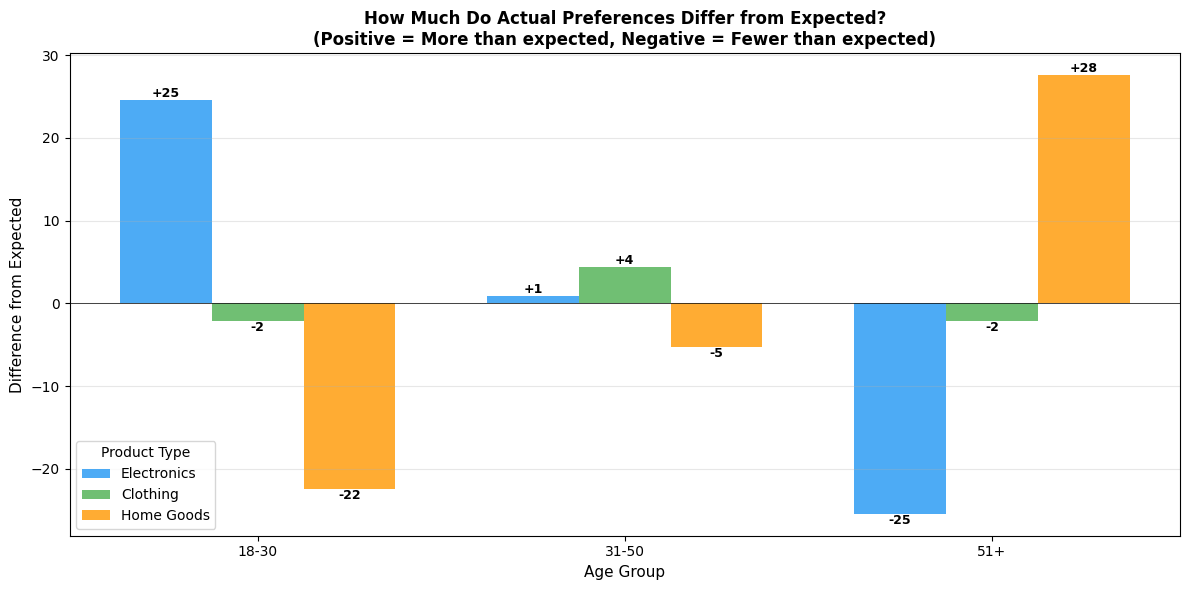


💼 BUSINESS INTERPRETATION:
✅ SIGNIFICANT RELATIONSHIP! (p-value = 0.00000000 < 0.05)

📈 Strategic Recommendations:
   1. TARGETED MARKETING:
      • Show electronics ads to 18-30 age group
      • Promote home goods to 51+ customers
      • Use age-based email segmentation

   2. INVENTORY MANAGEMENT:
      • Stock more electronics in college-area stores
      • Emphasize home goods in retirement communities

   3. STORE LAYOUT:
      • Place products strategically based on customer demographics
      • Consider age-specific store sections

   4. PRICING STRATEGY:
      • Age-targeted promotions and bundling
      • Loyalty programs based on preference patterns

💡 Statistical Insight:
   Chi-square = 53.500 measures how far our observed data
   is from what we'd expect if age didn't matter at all.
   With 4 degrees of freedom, this gives us p = 0.00000000


In [4]:
# Run chi-square test on product data
chi2_stat, p_value, dof, expected_freq = chi2_contingency(product_data)

print("🧮 Chi-Square Test for Product Preferences")
print("="*50)
print(f"Chi-square statistic: {chi2_stat:.3f}")
print(f"P-value: {p_value:.8f}")
print(f"Degrees of freedom: {dof}")
print()

# Show expected frequencies
expected_df = pd.DataFrame(expected_freq,
                          columns=product_data.columns,
                          index=product_data.index)
print("🎯 Expected Frequencies (if age and preference were independent):")
print(expected_df.round(1))
print()

# Calculate differences
differences = product_data - expected_df
print("📊 Difference (Observed - Expected):")
print(differences.round(1))
print()

# Visualize differences
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(product_data.index))
width = 0.25
colors = ['#2196F3', '#4CAF50', '#FF9800']

for i, (product, color) in enumerate(zip(product_data.columns, colors)):
    offset = width * (i - 1)
    bars = ax.bar(x + offset, differences[product], width, label=product, color=color, alpha=0.8)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:+.0f}',
                ha='center', va='bottom' if height > 0 else 'top',
                fontweight='bold', fontsize=9)

ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax.set_xlabel('Age Group', fontsize=11)
ax.set_ylabel('Difference from Expected', fontsize=11)
ax.set_title('How Much Do Actual Preferences Differ from Expected?\n(Positive = More than expected, Negative = Fewer than expected)',
             fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(product_data.index)
ax.legend(title='Product Type')
ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Business interpretation
print("\n💼 BUSINESS INTERPRETATION:")
print("="*50)
alpha = 0.05
if p_value < alpha:
    print(f"✅ SIGNIFICANT RELATIONSHIP! (p-value = {p_value:.8f} < 0.05)\n")
    print("📈 Strategic Recommendations:")
    print("   1. TARGETED MARKETING:")
    print("      • Show electronics ads to 18-30 age group")
    print("      • Promote home goods to 51+ customers")
    print("      • Use age-based email segmentation")
    print()
    print("   2. INVENTORY MANAGEMENT:")
    print("      • Stock more electronics in college-area stores")
    print("      • Emphasize home goods in retirement communities")
    print()
    print("   3. STORE LAYOUT:")
    print("      • Place products strategically based on customer demographics")
    print("      • Consider age-specific store sections")
    print()
    print("   4. PRICING STRATEGY:")
    print("      • Age-targeted promotions and bundling")
    print("      • Loyalty programs based on preference patterns")
else:
    print(f"❌ NO SIGNIFICANT RELATIONSHIP (p-value = {p_value:.8f} >= 0.05)\n")
    print("📊 Business Implication:")
    print("   • Age doesn't significantly affect product preference")
    print("   • Use same marketing strategy across all age groups")
    print("   • Focus on other factors (income, lifestyle, etc.)")

print("\n💡 Statistical Insight:")
print(f"   Chi-square = {chi2_stat:.3f} measures how far our observed data")
print("   is from what we'd expect if age didn't matter at all.")
print(f"   With {dof} degrees of freedom, this gives us p = {p_value:.8f}")

## Understanding the Chi-Square Calculation

Let's break down exactly how the chi-square statistic is calculated.

🔬 HOW CHI-SQUARE IS CALCULATED
Formula: χ² = Σ [(Observed - Expected)² / Expected]

Cell-by-Cell Calculation:
----------------------------------------------------------------------
18-30  × Electronics : 
  Observed= 80, Expected= 55.4, 
  Contribution=10.886
18-30  × Clothing    : 
  Observed= 50, Expected= 52.2, 
  Contribution= 0.091
18-30  × Home Goods  : 
  Observed= 20, Expected= 42.4, 
  Contribution=11.827
31-50  × Electronics : 
  Observed= 60, Expected= 59.1, 
  Contribution= 0.013
31-50  × Clothing    : 
  Observed= 60, Expected= 55.7, 
  Contribution= 0.340
31-50  × Home Goods  : 
  Observed= 40, Expected= 45.2, 
  Contribution= 0.602
51+    × Electronics : 
  Observed= 30, Expected= 55.4, 
  Contribution=11.670
51+    × Clothing    : 
  Observed= 50, Expected= 52.2, 
  Contribution= 0.091
51+    × Home Goods  : 
  Observed= 70, Expected= 42.4, 
  Contribution=17.981
----------------------------------------------------------------------

Sum of all contributions: 53.500
Sci

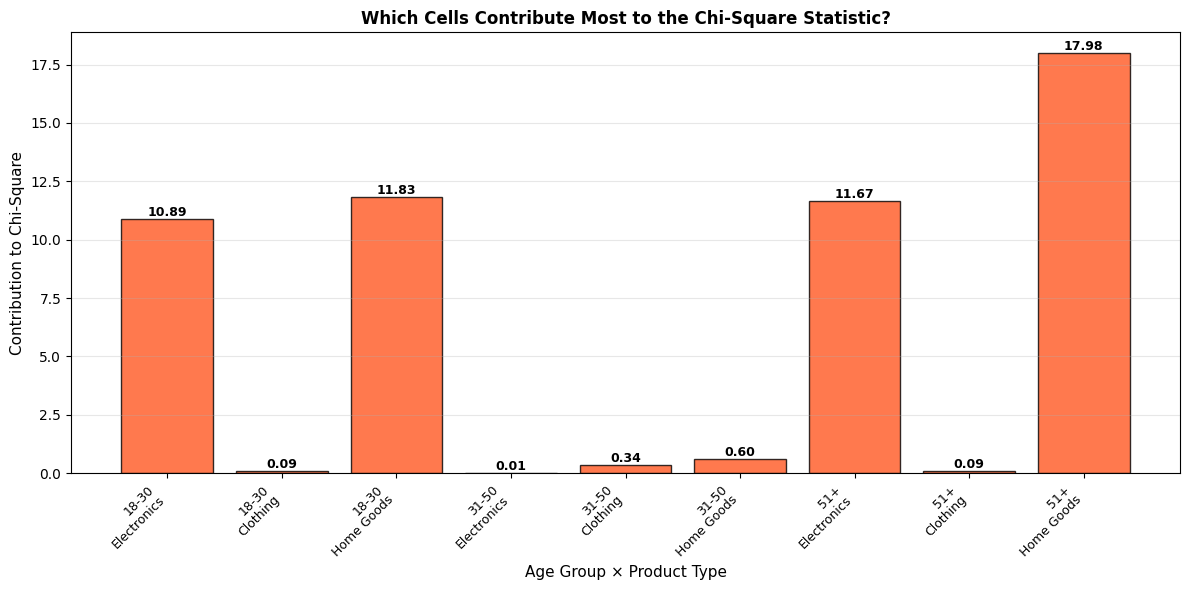


📊 Interpretation:
   • Taller bars = bigger deviation from expected
   • These cells drive the significant relationship
   • Biggest contributor: 51+ Home Goods


In [5]:
# Manual calculation for understanding
print("🔬 HOW CHI-SQUARE IS CALCULATED")
print("="*50)
print("Formula: χ² = Σ [(Observed - Expected)² / Expected]\n")

# Calculate for each cell
chi_square_components = []
print("Cell-by-Cell Calculation:")
print("-" * 70)

for age in product_data.index:
    for product in product_data.columns:
        observed = product_data.loc[age, product]
        expected = expected_df.loc[age, product]
        component = ((observed - expected) ** 2) / expected
        chi_square_components.append(component)
        
        print(f"{age:6s} × {product:12s}: ")
        print(f"  Observed={observed:3.0f}, Expected={expected:5.1f}, ")
        print(f"  Contribution={(component):6.3f}")

print("-" * 70)
manual_chi2 = sum(chi_square_components)
print(f"\nSum of all contributions: {manual_chi2:.3f}")
print(f"SciPy calculated:         {chi2_stat:.3f}")
print(f"Match: {'✓' if abs(manual_chi2 - chi2_stat) < 0.001 else '✗'}")

# Visualize contributions
fig, ax = plt.subplots(figsize=(12, 6))

labels = [f"{age}\n{product}" for age in product_data.index for product in product_data.columns]
x = np.arange(len(chi_square_components))

bars = ax.bar(x, chi_square_components, color='#FF5722', alpha=0.8, edgecolor='black')
ax.set_xlabel('Age Group × Product Type', fontsize=11)
ax.set_ylabel('Contribution to Chi-Square', fontsize=11)
ax.set_title('Which Cells Contribute Most to the Chi-Square Statistic?', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
ax.grid(alpha=0.3, axis='y')

# Add value labels
for bar, val in zip(bars, chi_square_components):
    ax.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
            f'{val:.2f}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print("   • Taller bars = bigger deviation from expected")
print("   • These cells drive the significant relationship")
max_idx = chi_square_components.index(max(chi_square_components))
print(f"   • Biggest contributor: {labels[max_idx].replace(chr(10), ' ')}")

## Summary: Chi-Square Test

### Key Concepts
- **Purpose:** Tests if two categorical variables are related/associated
- **Null Hypothesis:** The variables are independent (no relationship)
- **Alternative:** The variables are related (there's a pattern)
- **Statistic:** Measures how far observed frequencies are from expected frequencies

### When to Use
✅ **Good for:**
- Categorical data (groups, categories, yes/no)
- Testing independence between two variables
- Survey data and contingency tables
- A/B testing with multiple categories

❌ **Not for:**
- Continuous numerical data (use t-test or ANOVA)
- Small sample sizes (need ≥5 expected per cell)
- Measuring strength of relationship (use Cramér's V)

### Business Applications
- **Marketing:** Does age affect product preference?
- **A/B Testing:** Do different website versions affect conversion by device type?
- **Demographics:** Is income level related to brand choice?
- **HR:** Does department affect employee satisfaction?
- **Retail:** Is purchase behavior related to store location?

### Interpretation Guide
- **P-value < 0.05:** Significant relationship exists
- **P-value ≥ 0.05:** No significant relationship (variables likely independent)
- **Large χ²:** Strong evidence of relationship
- **Small χ²:** Observed data close to expected (independent scenario)

### Important Assumptions
1. **Independence:** Each observation is independent
2. **Sample Size:** Expected frequency ≥5 in each cell
3. **Categorical Data:** Variables must be categorical, not continuous
4. **Random Sampling:** Data collected randomly

### Remember
💡 Chi-square tells you **IF** there's a relationship, not **HOW STRONG** it is  
💡 Always look at the actual data (contingency table) to understand the pattern  
💡 Statistical significance ≠ practical importance (check effect sizes too)